In [1]:
using LinearAlgebra
squarednorm(x) = dot(x, x)
using Distributions
using StatsPlots
default(fmt=:png)
r(x) = round(x; sigdigits=3)

function simplelinreg(x, y)
    n = length(x)
    A = x .^ (0:1)'
    β̂ = A \ y
    df = n - 2
    ŝ = √(squarednorm(y - A*β̂) / df)
    sehat = ŝ*√(inv(A'A)[2,2])
    tval = β̂[2]/sehat
    pval = 2ccdf(TDist(df), abs(tval))
    (; A, β̂, df, sehat, tval, pval)
end

simplelinreg (generic function with 1 method)

n = length(x) = 10
se = √((inv(A' * A))[2, 2]) = 0.11009637651263605
c / L = 0.04906


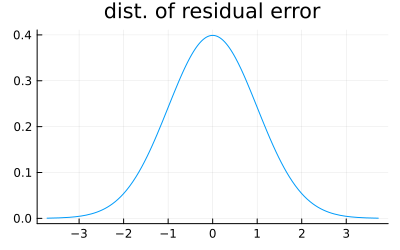

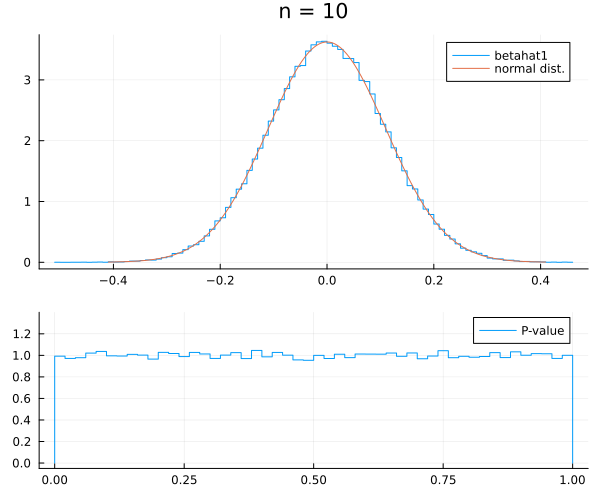

In [2]:
x = 1:10
@show n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
α = 0.05
c = 0
dist = Normal()
#dist = Exponential()-1
#dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
end
@show c/L
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
P = stephist(betahat1; norm=true, label="betahat1")
plot!(Normal(0, se); label="normal dist.")
title!("n = $n")
Q = stephist(pval_beta1; norm=true, label="P-value")
plot!()
plot!(ylim=(-0.05, 1.4))
plot(P, Q; size=(600, 500), layout=@layout[a{0.6h}; b])

n = length(x) = 10
se = √((inv(A' * A))[2, 2]) = 0.11009637651263605
c / L = 0.04566


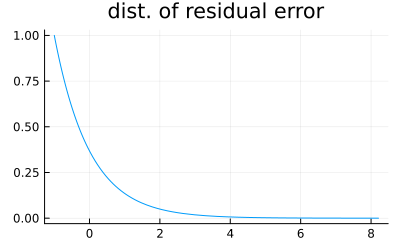

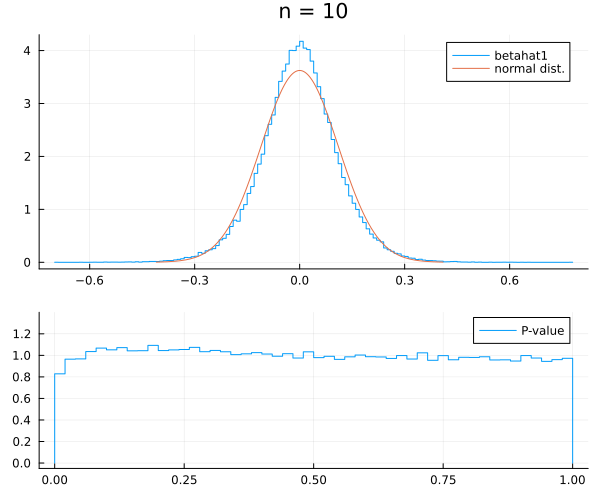

In [3]:
x = 1:10
@show n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
α = 0.05
c = 0
#dist = Normal()
dist = Exponential()-1
#dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
end
@show c/L
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
P = stephist(betahat1; norm=true, label="betahat1")
plot!(Normal(0, se); label="normal dist.")
title!("n = $n")
Q = stephist(pval_beta1; norm=true, label="P-value")
plot!()
plot!(ylim=(-0.05, 1.4))
plot(P, Q; size=(600, 500), layout=@layout[a{0.6h}; b])

n = length(x) = 30
se = √((inv(A' * A))[2, 2]) = 0.021093572976433474
c / L = 0.04921


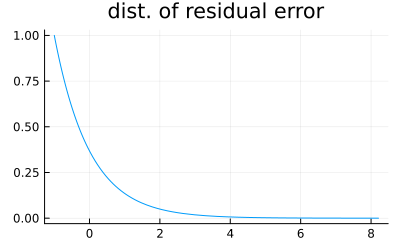

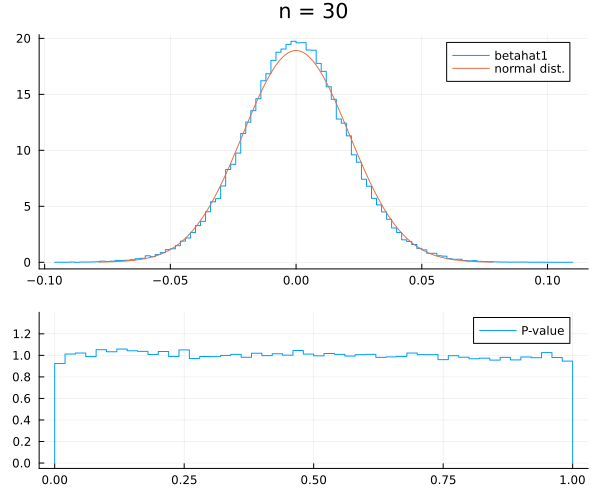

In [4]:
x = 1:30
@show n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
α = 0.05
c = 0
#dist = Normal()
dist = Exponential()-1
#dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
end
@show c/L
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
P = stephist(betahat1; norm=true, label="betahat1")
plot!(Normal(0, se); label="normal dist.")
title!("n = $n")
Q = stephist(pval_beta1; norm=true, label="P-value")
plot!()
plot!(ylim=(-0.05, 1.4))
plot(P, Q; size=(600, 500), layout=@layout[a{0.6h}; b])

n = length(x) = 10
se = √((inv(A' * A))[2, 2]) = 0.11009637651263605
c / L = 0.04993


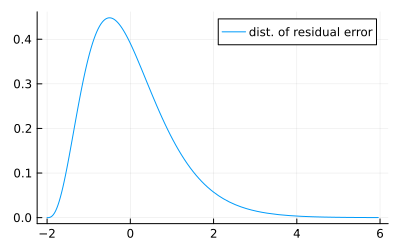

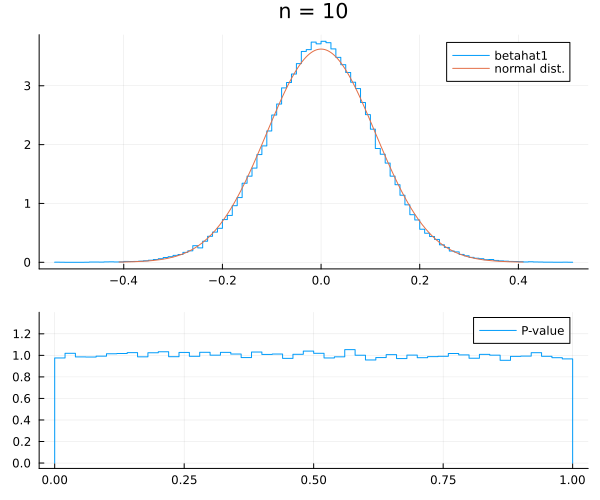

In [5]:
x = 1:10
@show n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
α = 0.05
c = 0
#dist = Normal()
#dist = Exponential()-1
dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
end
@show c/L
plot(dist; label="dist. of residual error", size=(400, 250)) |> display
P = stephist(betahat1; norm=true, label="betahat1")
plot!(Normal(0, se); label="normal dist.")
title!("n = $n")
Q = stephist(pval_beta1; norm=true, label="P-value")
plot!()
plot!(ylim=(-0.05, 1.4))
plot(P, Q; size=(600, 500), layout=@layout[a{0.6h}; b])

se = √((inv(A' * A))[2, 2]) = 0.02008048322256247


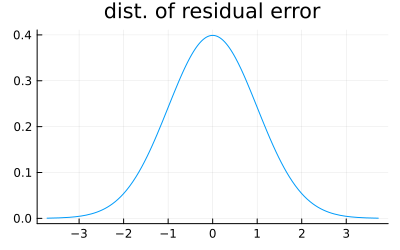

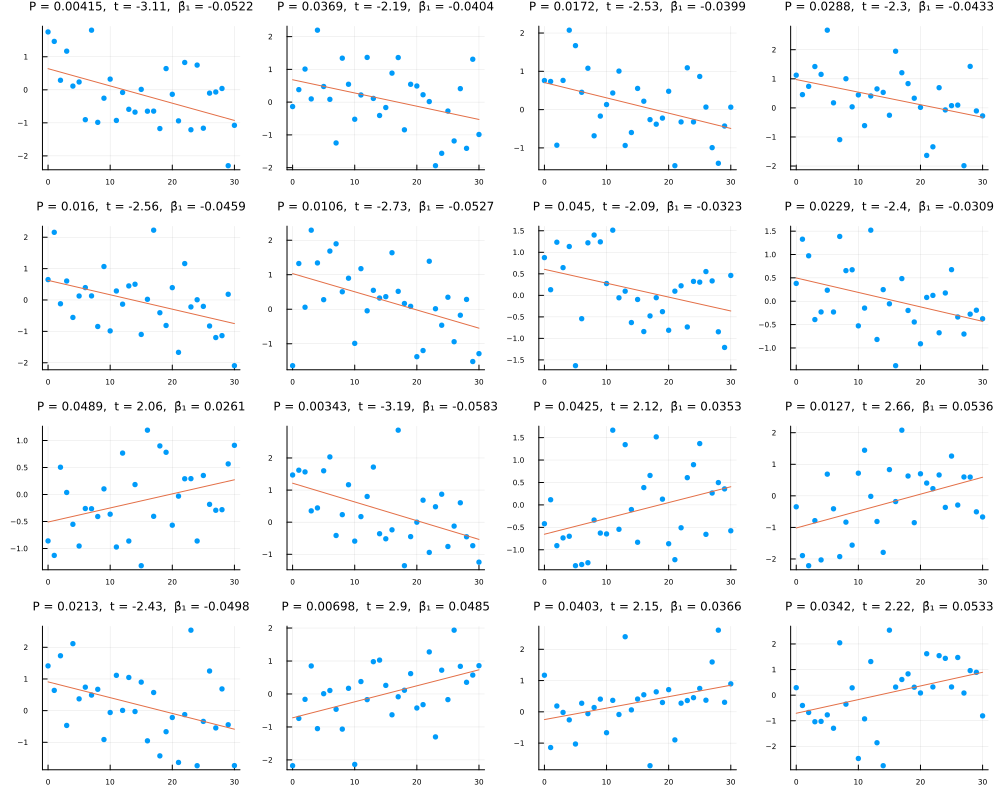

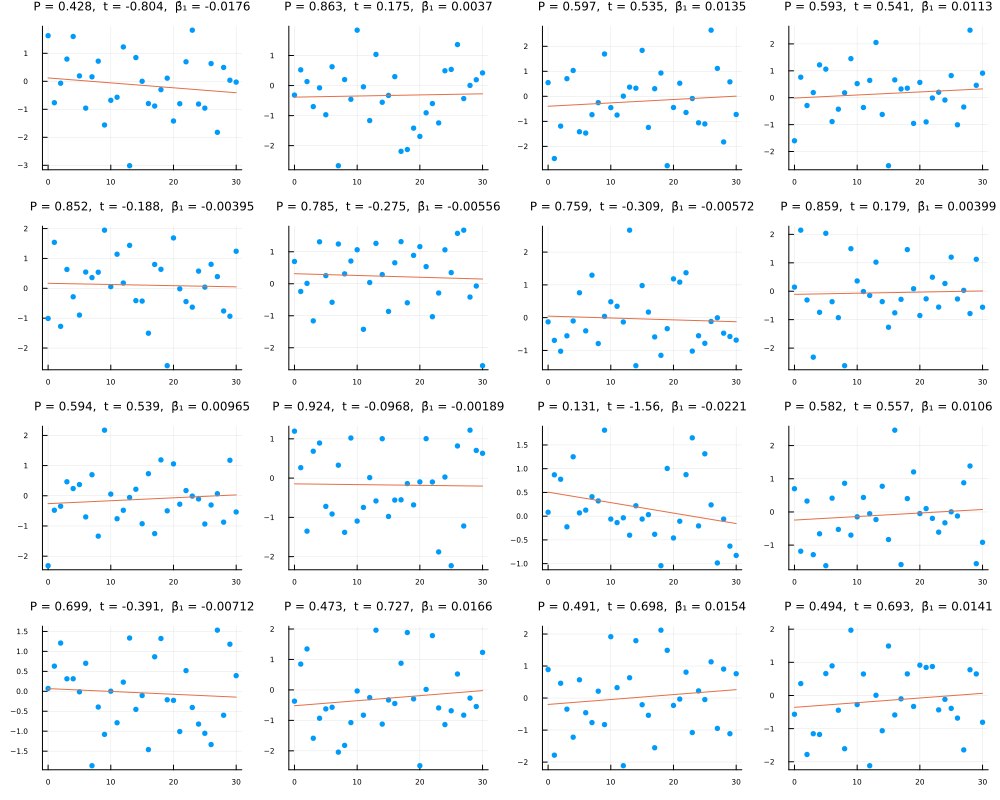

In [6]:
x = 0:30
n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
c = 0
PP = []
QQ = []
np = nq = 0
α = 0.05
npmax = nqmax = 16
dist = Normal()
#dist = Exponential()-1
#dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
    P = scatter(x, y; label="", ms=3, msc=:auto)
    plot!(x -> evalpoly(x, β̂), extrema(x)...; label="")
    title!("P = $(r(pval)),  t = $(r(tval)),  β̂₁ = $(r(β̂[2]))")
    plot!(tickfontsize=5, titlefontsize=8)
    if np < npmax && pval < α
        push!(PP, P)
        np += 1
    elseif nq < nqmax && pval ≥ α
        push!(QQ, P)
        nq += 1
    elseif np ≥ npmax && nq ≥ nqmax
        break
    end
end
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
plot(PP...; size=(1000, 800), layout=(4, 4)) |> display
plot(QQ...; size=(1000, 800), layout=(4, 4))

se = √((inv(A' * A))[2, 2]) = 0.02008048322256247


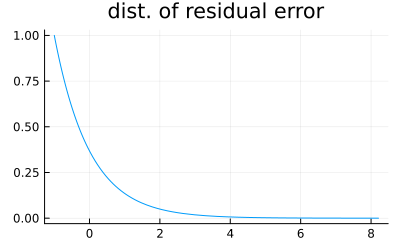

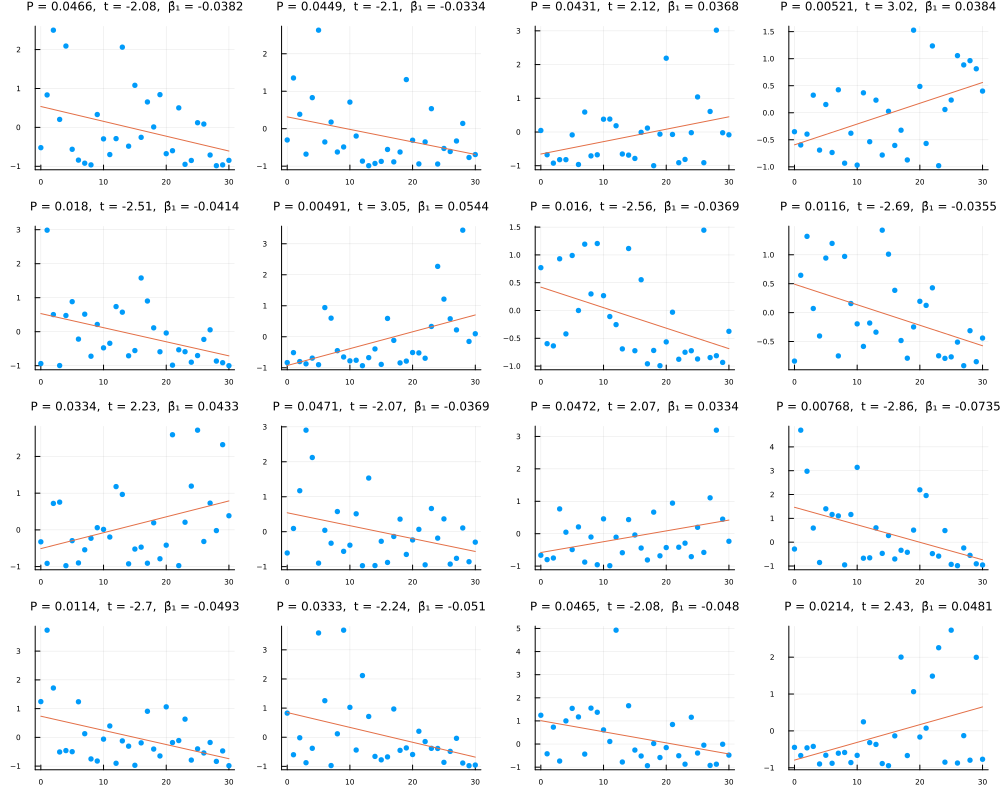

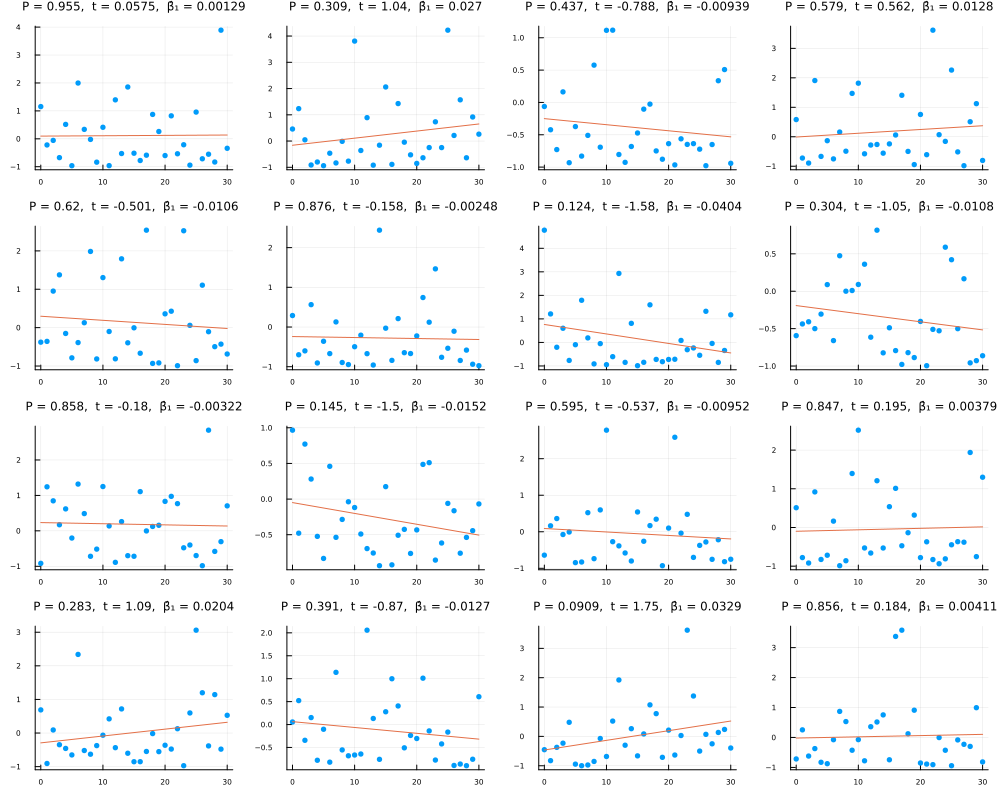

In [7]:
x = 0:30
n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
c = 0
PP = []
QQ = []
np = nq = 0
α = 0.05
npmax = nqmax = 16
#dist = Normal()
dist = Exponential()-1
#dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
    P = scatter(x, y; label="", ms=3, msc=:auto)
    plot!(x -> evalpoly(x, β̂), extrema(x)...; label="")
    title!("P = $(r(pval)),  t = $(r(tval)),  β̂₁ = $(r(β̂[2]))")
    plot!(tickfontsize=5, titlefontsize=8)
    if np < npmax && pval < α
        push!(PP, P)
        np += 1
    elseif nq < nqmax && pval ≥ α
        push!(QQ, P)
        nq += 1
    elseif np ≥ npmax && nq ≥ nqmax
        break
    end
end
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
plot(PP...; size=(1000, 800), layout=(4, 4)) |> display
plot(QQ...; size=(1000, 800), layout=(4, 4))

se = √((inv(A' * A))[2, 2]) = 0.02008048322256247


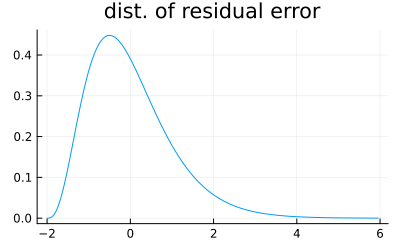

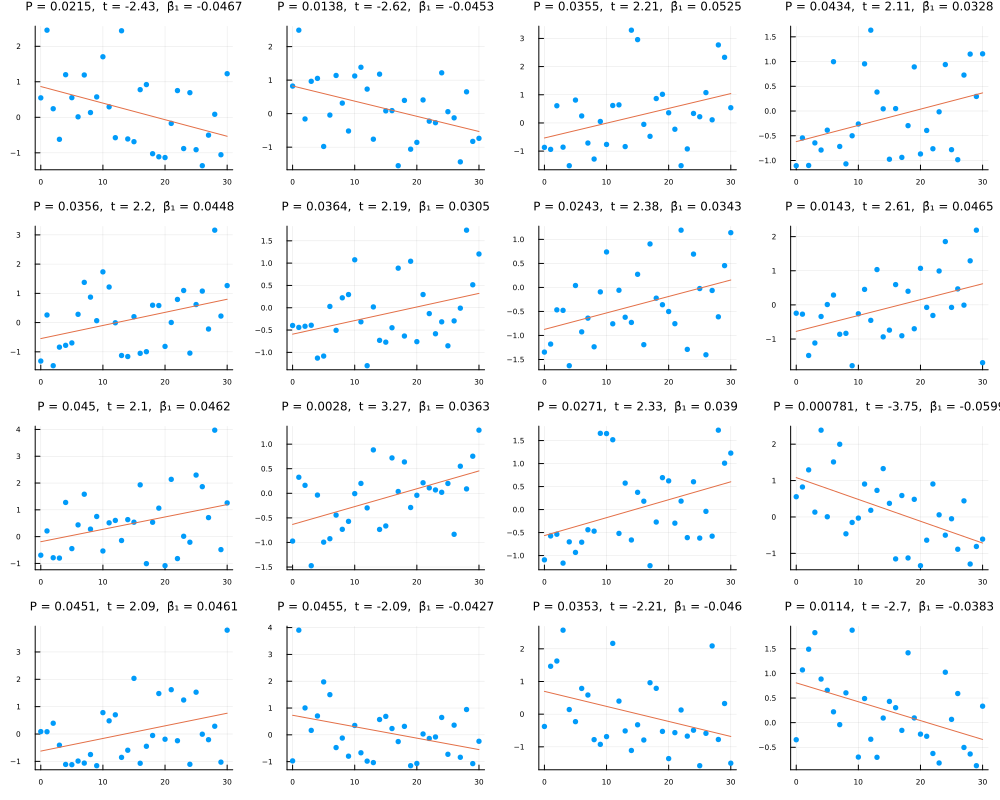

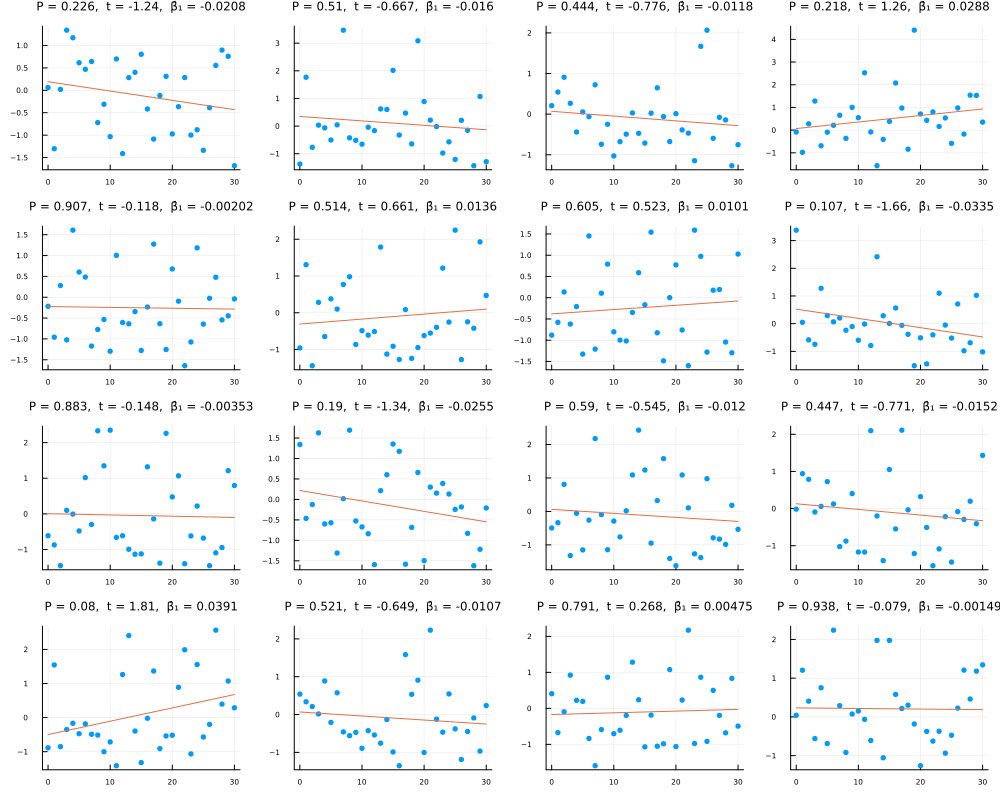

In [8]:
x = 0:30
n = length(x)
A = x .^ (0:1)'
@show se = √(inv(A'A)[2,2])
L = 10^5
betahat1 = zeros(L)
pval_beta1 = zeros(L)
c = 0
PP = []
QQ = []
np = nq = 0
α = 0.05
npmax = nqmax = 16
#dist = Normal()
#dist = Exponential()-1
dist = Gamma(4, 1/2)-2
for i in 1:L
    y = rand(dist, n)
    (; A, β̂, df, sehat, tval, pval) = simplelinreg(x, y)
    betahat1[i] = β̂[2]
    pval_beta1[i] = pval
    c += pval < α
    P = scatter(x, y; label="", ms=3, msc=:auto)
    plot!(x -> evalpoly(x, β̂), extrema(x)...; label="")
    title!("P = $(r(pval)),  t = $(r(tval)),  β̂₁ = $(r(β̂[2]))")
    plot!(tickfontsize=5, titlefontsize=8)
    if np < npmax && pval < α
        push!(PP, P)
        np += 1
    elseif nq < nqmax && pval ≥ α
        push!(QQ, P)
        nq += 1
    elseif np ≥ npmax && nq ≥ nqmax
        break
    end
end
plot(dist; label="", title="dist. of residual error", size=(400, 250)) |> display
plot(PP...; size=(1000, 800), layout=(4, 4)) |> display
plot(QQ...; size=(1000, 800), layout=(4, 4))